In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
df01= pd.read_csv (r'C:\Users\PROXY INFO\Downloads\kc_house_data.csv')
df01

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [2]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [42]:
df01['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

# visualisation

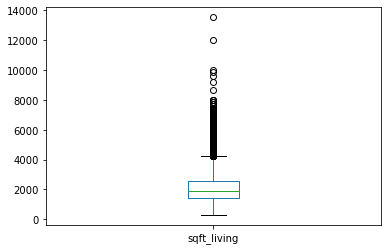

In [3]:
df01['sqft_living'].plot.box()

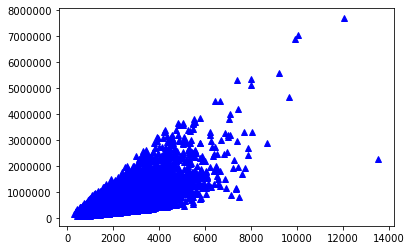

In [4]:
plt.plot(df01['sqft_living'],df01['price'],'b^')
plt.show()

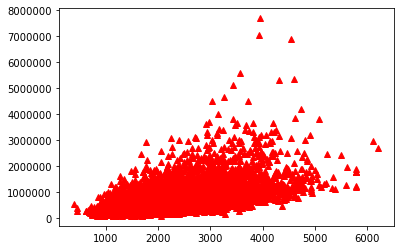

In [5]:
plt.plot(df01['sqft_living15'],df01['price'],'r^')
plt.show()

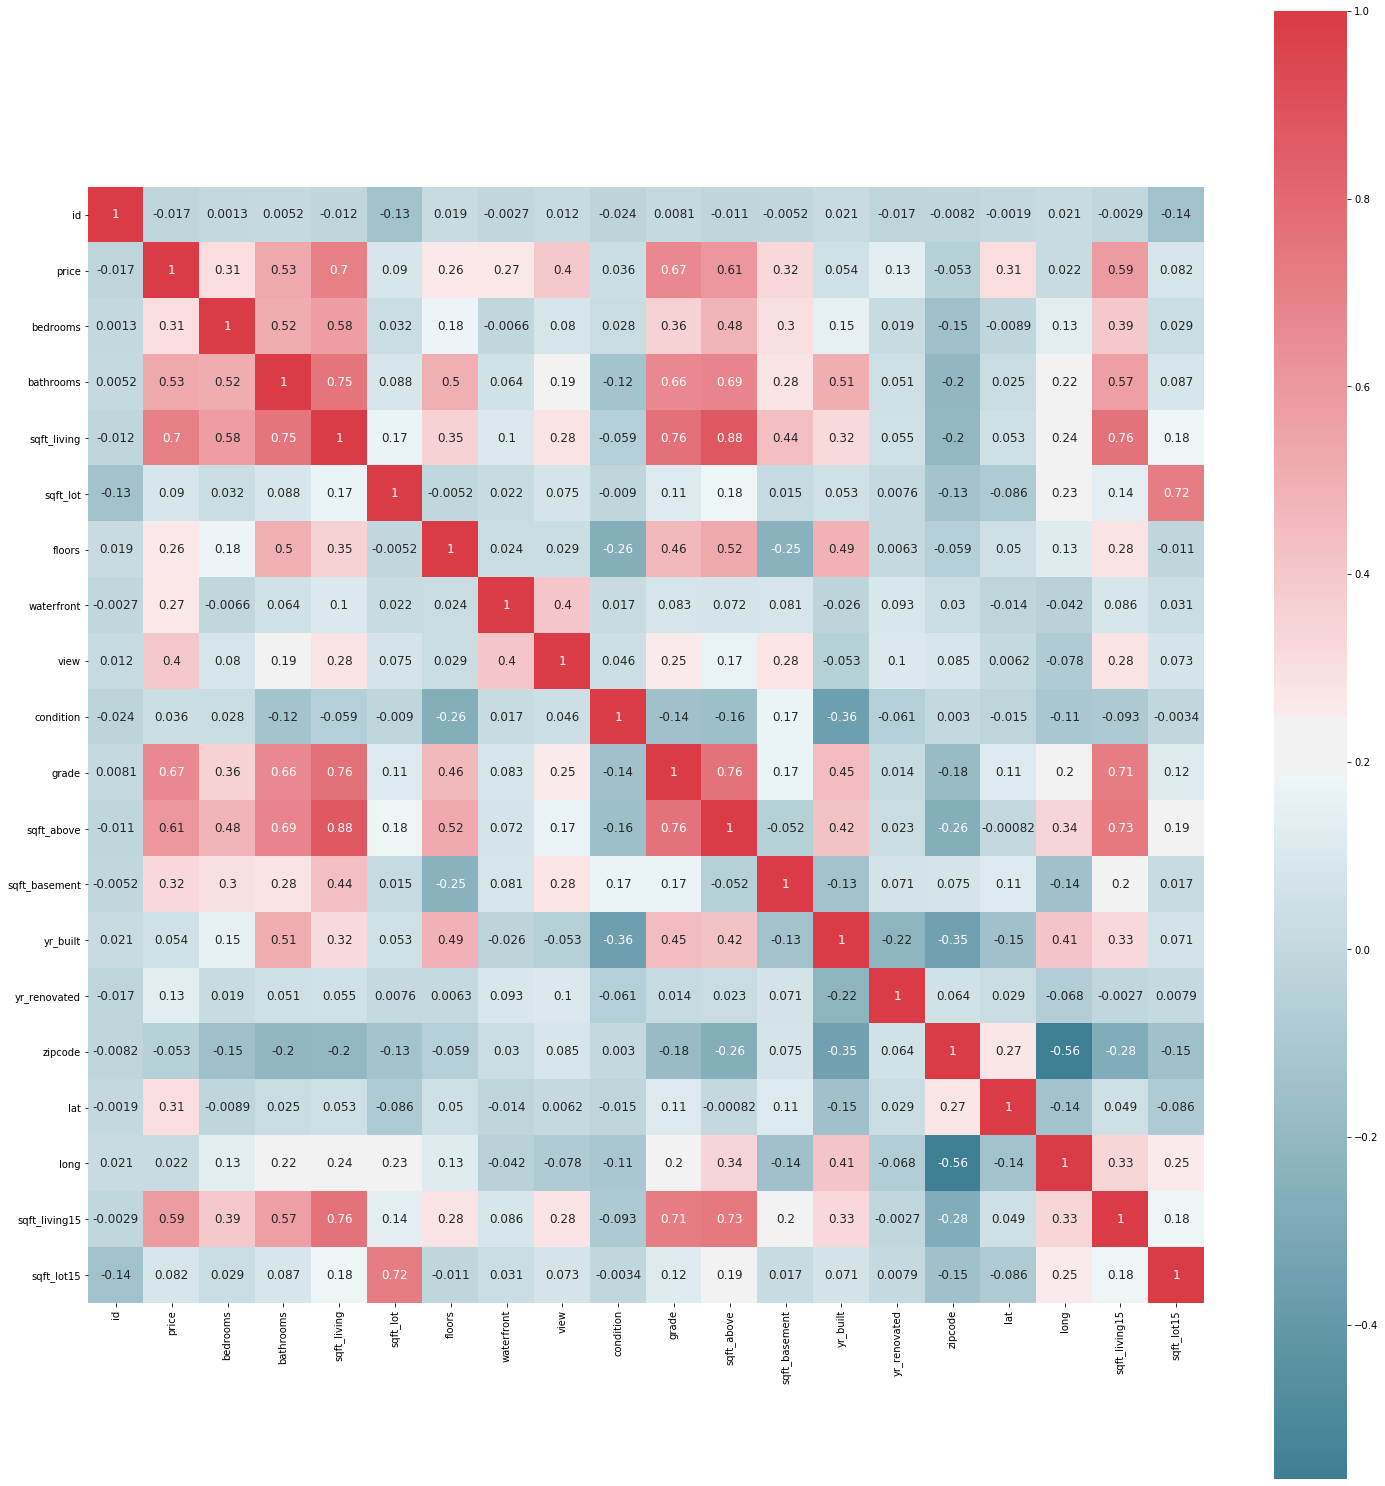

In [6]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 25 , 30 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( df01 )

In [7]:
print("As we can see in the correlation table, the price of a house is depending the number of bedrooms and bathrooms. it is depending also on the area of living space, the grade , the view and the lattitude of the house")
      

As we can see in the correlation table, the price of a house is depending the number of bedrooms and bathrooms. it is depending also on the area of living space, the grade , the view and the lattitude of the house


In [8]:
df02= df01.drop(['id','sqft_lot','condition','sqft_lot15','long','yr_renovated','yr_built','condition','sqft_lot','date'], axis=1)
df02

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,zipcode,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,98178,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,98125,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,98028,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,98136,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,98074,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,98103,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,98146,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,98144,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,98027,47.5345,1410


In [24]:
x=df02[['sqft_living','bedrooms','bathrooms','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']]
y=df02['price']
x_test,x_train,y_test,y_train=train_test_split(x,y, train_size=0.3, random_state=20)
y_test

15541     482500.0
282      2050000.0
12211    1190000.0
12251     595000.0
8890      150000.0
           ...    
1607      336000.0
3915      425000.0
14729     620000.0
4367      800000.0
15715     751000.0
Name: price, Length: 6483, dtype: float64

In [27]:
x01=pd.DataFrame(x_train['sqft_living'])
x01
x01_test=pd.DataFrame(x_test['sqft_living'])
x01_test


,sqft_living
15541,1630
282,3830
12211,3480
12251,3130
8890,830
...,...
1607,2820
3915,1670
14729,2480
4367,2150


In [28]:
regression.fit(x01,y_train)
predict=regression.predict(x01_test)
predict

array([ 415276.79604882, 1027544.77557565,  930138.50610547, ...,
        651834.87904782,  559994.6821188 ,  821600.09155299])

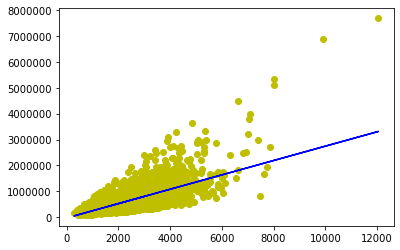

In [32]:
plt.scatter(x01_test,y_test, color='y')
plt.plot(x01_test,predict,color='b')
plt.show()
#the linear regression in this case isn't efficient. As we can see most of the houses are grouped in one interval on area (between 100 and 5000sqft).the linear regressoin can't give a valuable prediction for houses with big superficy.

In [33]:
print("MSE", metrics.mean_squared_error(y_test,predict))
print("R",metrics.r2_score(y_test,predict))

MSE 69681415107.28342
R 0.5065079366056151


In [35]:
regression=LinearRegression()
regression.fit(x_train,y_train)
predict01=regression.predict(x_test)
predict01

array([ 479089.66951916, 1018897.09410566, 1113412.78807239, ...,
        621283.93563352,  496975.28542076,  923411.68507421])

In [36]:
print("MSE", metrics.mean_squared_error(y_test,predict01))
print("R",metrics.r2_score(y_test,predict01))
#As we can see MSE for multilinear regression is less than the MSE of linear regression, however Mse is still very high. We can't applicate multilinear regression in this case

MSE 47600031795.48314
R 0.6628909175821833


In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly01=PolynomialFeatures(degree=2)
x_train_fit=poly01.fit_transform(x_train)
regression.fit(x_train_fit,y_train)
x_test_fit=poly01.fit_transform(x_test)
predict02=regression.predict(x_test_fit)
print("MSE", metrics.mean_squared_error(y_test,predict02))
print("R",metrics.r2_score(y_test,predict02))


MSE 35798784385.27843
R 0.746468754314159


In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly02=PolynomialFeatures(degree=3)
x_train_fit=poly02.fit_transform(x_train)
regression.fit(x_train_fit,y_train)
x_test_fit=poly02.fit_transform(x_test)
predict03=regression.predict(x_test_fit)
print("MSE", metrics.mean_squared_error(y_test,predict03))
print("R",metrics.r2_score(y_test,predict03))


MSE 38016820660.59319
R 0.7307603577997739


In [ ]:
#polynomial regression degree equal 2 gives us the best prediction. We have the less MSE. However it still very high 